# Python for Data Science (BRN Skill Assessment) 
This project is part of the [BRN Skill Assessments](https://github.com/Bioinformatics-Research-Network/skill-assessments/tree/main/Python%20for%20Data%20Science). It presents my comprehensive analysis of the ``` gapminder_clean.csv``` dataset provided. The goal of the analysis is to use appropriate stat tests in order to accurately answer several key questions.

Submitted by: Zain Ziad </br>
Date: 21-May-23

## Step 1: Importing important libraries and cleaning the dataset. 

In [3]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import plotly.express as px

In [12]:
df_original = pd.read_csv('data.csv')
df_original.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


The provided dataset was renamed to ```data.csv``` and imported as ```df_original```. A quick overview of the dataset shows us there's an unnecessary unnamed column in the start. There are a lot of **Null** values present in the dataset but we’ll keep them for now. Fortunately, there were no duplicate observations in our dataset. 

In [ ]:
df_original.drop(columns='Unnamed: 0', inplace=True)            #Dropping the unnamed column. 
df = df_original                                                #Making a copy of the original dataset. 

## Step 2: Part 1 of the analysis. 
<li>Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing <code>CO2 emissions (metric tons per capita)</code> and <code>gdpPercap</code> for the filtered data. </li>

<Axes: xlabel='CO2 emissions (metric tons per capita)', ylabel='gdpPercap'>

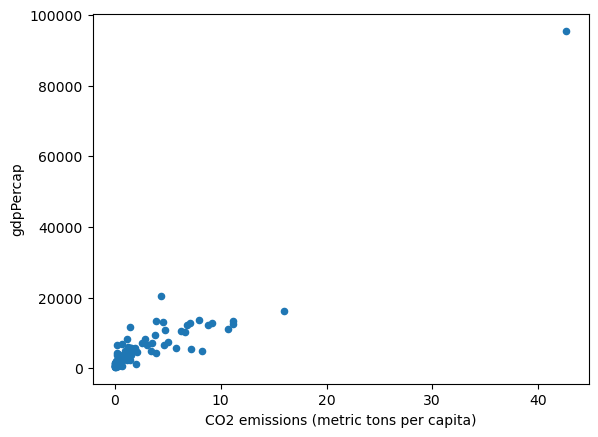

In [14]:
df = df.dropna(subset=['CO2 emissions (metric tons per capita)','gdpPercap'])                                   #Dropping any null values in the two columns which wil be used for analysis. 
df_1962 = df[df['Year'] == 1962]
df_1962.plot.scatter(x='CO2 emissions (metric tons per capita)', y='gdpPercap')

<li> On the filtered data, calculate the correlation of <code>CO2 emissions (metric tons per capita)</code> and <code>gdpPercap</code>. What is the correlation and associated p value?

In [15]:
stat = pearsonr(df_1962['CO2 emissions (metric tons per capita)'],df_1962['gdpPercap'])                         #Using pearson correlation.
print(' Correlation between CO2 Emissions and GDP:', stat[0],"\n",'pvalue:', stat[1])

 Correlation between CO2 Emissions and GDP: 0.9260816725019472 
 pvalue: 1.1286792210038658e-46


The correlation between CO2 Emissions and GDP per capita is strong (closer to 1). The associated P-Value with a significance level (alpha) of **0.05** is also very low, which indicates that the observed data provides strong evidence against the null hypothesis. 
<li>On the unfiltered data, answer "In what year is the correlation between <code>CO2 emissions (metric tons per capita)</code> and <code>gdpPercap</code> the strongest?" Filter the dataset to that year for the next step...

In [54]:
for year in df['Year'].unique():
    df_temp = df[df['Year'] == year]
    print(f"Correlation between CO2 Emissions and GDP in {year} is: {pearsonr(df_temp['CO2 emissions (metric tons per capita)'],df_temp['gdpPercap'])[0]}")

Correlation between CO2 Emissions and GDP in 1962 is: 0.9260816725019472
Correlation between CO2 Emissions and GDP in 1967 is: 0.938791838506331
Correlation between CO2 Emissions and GDP in 1972 is: 0.8428985866268461
Correlation between CO2 Emissions and GDP in 1977 is: 0.7928335935904498
Correlation between CO2 Emissions and GDP in 1982 is: 0.8166384024309294
Correlation between CO2 Emissions and GDP in 1987 is: 0.809553084119189
Correlation between CO2 Emissions and GDP in 1992 is: 0.8094316203754857
Correlation between CO2 Emissions and GDP in 1997 is: 0.8081396359866697
Correlation between CO2 Emissions and GDP in 2002 is: 0.8006420656289516
Correlation between CO2 Emissions and GDP in 2007 is: 0.7204168835195921


Correlation between CO2 Emissions and GDP was the strongest in **1967**.
<li>Using <b>plotly</b> or <b>bokeh</b>, create an interactive scatter plot comparing <code>CO2 emissions (metric tons per capita)</code> and <code>gdpPercap</code>, where the point size is determined by pop (population) and the color is determined by the continent.</li>

In [17]:
fig = px.scatter(df[df['Year'] == 1967], x='CO2 emissions (metric tons per capita)', y='gdpPercap', color="continent", size='pop')          #Using plotly express to make an interactive scatter plot. 
fig.show()

## Step 3: Part 2 of the analysis. 
<li> What is the relationship between <code>continent</code> and <code>Energy use (kg of oil equivalent per capita)</code>? </li>

In [19]:
df = df_original                                                                                        #Let's make a fresh copy of the original dataset. 
df = df.dropna(subset=['Energy use (kg of oil equivalent per capita)','continent'])                     #Drop any null values in the two columns where we'll be conducting our analysis. 

In [20]:
continent_groups = df.groupby('continent')
means = continent_groups['Energy use (kg of oil equivalent per capita)'].mean()
continent_data = [df[df['continent'] == continent]['Energy use (kg of oil equivalent per capita)'] for continent in means.index]
statistic, p_value = f_oneway(*continent_data)                                                                                              #We will be using one way ANOVA to answer this question. 
print("ANOVA Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

ANOVA Test Results:
Statistic: 51.45915759042634
p-value: 8.527003487154367e-39


Since the **p-value** is significantly smaller than the typical significance level of **0.05**, we can conclude that there is strong evidence to reject the null hypothesis. Therefore, we can infer that there is a significant relationship between the ```continent``` and ```Energy use``` columns in the data. <br>
<br>
*In other words, the statistical analysis suggests that **there are significant differences in energy use between the continents.***<br>
<br>
To visualize our findings, we will use a box plot. The box plot will display a box for each continent, showing the median, quartiles, and possible outliers. This visualization allows us to compare the distribution of energy use across different continents and observe any differences or similarities.

In [59]:
fig = px.box(df[['continent', 'Energy use (kg of oil equivalent per capita)']], x='continent', y='Energy use (kg of oil equivalent per capita)',
             title="Relationship between Continent and Energy Use",
             labels={'Energy use (kg of oil equivalent per capita)': 'Energy Use (kg of oil equivalent per capita)'})
fig.show()

<li> Is there a significant difference between Europe and Asia with respect to <code>Imports of goods and services (% of GDP)</code> in the years after 1990? (Stats test needed)

In [21]:
df = df_original                                                                                #Let's make a fresh copy of the original dataset.
df = df.dropna(subset=['Imports of goods and services (% of GDP)', 'continent'])                #Drop any null values in the two columns where we'll be conducting our analysis.

In [22]:
filtered_data = df[df['Year'] > 1990]
filtered_data = filtered_data[['continent', 'Imports of goods and services (% of GDP)']]
europe_data = filtered_data[filtered_data['continent'] == 'Europe']
asia_data = filtered_data[filtered_data['continent'] == 'Asia']
statistic, p_value = ttest_ind(europe_data['Imports of goods and services (% of GDP)'], asia_data['Imports of goods and services (% of GDP)'])              #Using ttest. 
alpha = 0.05
print('p-value:', p_value)
if p_value < alpha:
    print("There is a significant difference between Europe and Asia with respect to imports of goods and services.")
else:
    print("There is no significant difference between Europe and Asia with respect to imports of goods and services.")

p-value: 0.15751969325554196
There is no significant difference between Europe and Asia with respect to imports of goods and services.


Since the p-value is greater than the typical significance level of **0.05**, we fail to reject the null hypothesis. So based on the statistical analysis, there is no significant difference between Europe and Asia regarding imports of goods and services in the years after 1990. </br> Let's visualize our findings by comparing the means in a standard bar chart. 

In [62]:
mean_data = filtered_data.groupby('continent').mean().reset_index()
fig = px.bar(mean_data, x='continent', y='Imports of goods and services (% of GDP)', color='continent', title="Comparison of Mean Imports of goods and services (% of GDP) after 1990")
fig.show()

<li> What is the country (or countries) that has the highest <code>Population density (people per sq. km of land area)</code> across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?) </li>

In [23]:
df = df_original                                                                                            #Let's make a fresh copy of the original dataset.
df = df.dropna(subset=['Population density (people per sq. km of land area)', 'Year'])                      #Drop any null values in the two columns where we'll be conducting our analysis.

In [72]:
average_ranking = df.groupby('Country Name')['Population density (people per sq. km of land area)'].mean().reset_index()
sorted_data = average_ranking.sort_values(by='Population density (people per sq. km of land area)', ascending=False)
highest_ranking_countries = sorted_data[sorted_data['Population density (people per sq. km of land area)'] == sorted_data['Population density (people per sq. km of land area)'].max()]
print('Country that has the highest population density (people per sq. km of land area) across all years is:', highest_ranking_countries['Country Name'].values[0])

Country that has the highest population density (people per sq. km of land area) across all years is: Macao SAR, China


To visualize our findings, we'll use a line graph that shows population density changes over time for each country. To make things simple, only the top 5 countries are shown by default. You can view the data of other countries by clicking the country name on the right. 

In [91]:
fig = px.line(df, x='Year', y='Population density (people per sq. km of land area)', color='Country Name',
              title='Population Density Over Time', range_x=[df['Year'].min(), df['Year'].max()],
              labels={'Population density (people per sq. km of land area)': 'Population Density'}).update_traces(visible="legendonly", selector=lambda t: not t.name in sorted_data['Country Name'].values[0:5])
fig.update_layout(xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type='date',
    )
)
fig.show()

<li> What country (or countries) has shown the greatest increase in <code>Life expectancy at birth, total (years)</code> between 1962 and 2007? </li>

In [24]:
df = df_original                                                                        #Let's make a fresh copy of the original dataset.
df = df.dropna(subset=['Life expectancy at birth, total (years)', 'Year'])              #Drop any null values in the two columns where we'll be conducting our analysis.

In [28]:
filtered_data = df[(df['Year'] >= 1962) & (df['Year'] <= 2007)]
pivoted_data = filtered_data.pivot(index='Country Name', columns='Year', values='Life expectancy at birth, total (years)').dropna()
pivoted_data['Increase'] = pivoted_data[2007] - pivoted_data[1962]
sorted_data = pivoted_data.sort_values(by='Increase', ascending=False)
highest_increase_countries = sorted_data[sorted_data['Increase'] == sorted_data['Increase'].max()]
print(highest_increase_countries.index[0])

Maldives


The country with the highest increase in life expectancy between 1962 and 2007 is **Maldives.** Next, we'll visualize our findings in a bar chart. 

In [40]:
fig = px.bar(sorted_data, x=sorted_data.index, y='Increase', title='Increase in Life Expectancy (1962-2007)',
             labels={'x': 'Country', 'Increase': 'Increase in Life Expectancy (Years)'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()